<a href="https://colab.research.google.com/github/manasik29/Simple-Linear-Regression/blob/main/Simple_Linear_Regression_Newspaper_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***SIMPLE LINEAR REGRESSION***


1. Load Data

2. EDA

3. Built Regression equation

4. Model parameters
 - beta0, 
 - beta1, 
 - t-values, 
 - p-values, 
 - r squared values

5. Prediction



***1. Load Data***

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/content/NewspaperData.csv')

In [4]:
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


***2. EDA***

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [7]:
#Correlation Coef
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [8]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


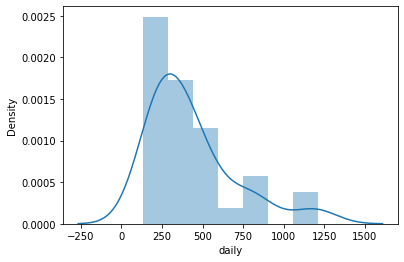

In [9]:
sns.distplot(data.daily)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


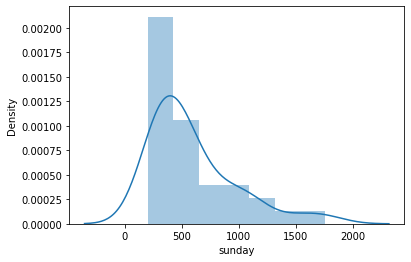

In [10]:
sns.distplot(data.sunday)

***3. Fitting a Linear Regression Equation***

In [15]:
import statsmodels.formula.api as smf

In [16]:
model = smf.ols("sunday~daily", data = data).fit()

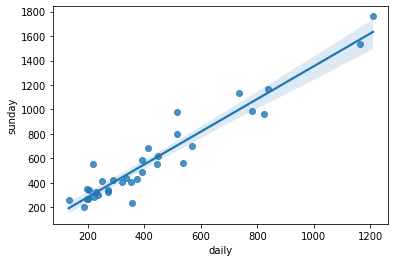

In [17]:
sns.regplot(x ="daily", y ="sunday", data = data)

In [18]:
#coeffecients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [23]:
#t-value, p-value
print(model.tvalues,'\n', model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [24]:
#R squared values
model.rsquared

0.9180596895873295

***Prediction***

In [29]:
#Predict fro 200 and 300 daily circulation
newdata = pd.Series([200,300])

In [30]:
newdata

0    200
1    300
dtype: int64

In [35]:
data_pred = pd.DataFrame(newdata, columns = ['daily'])

In [36]:
data_pred

,daily
0,200
1,300


In [37]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64